#### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pylab as plt
import pickle

#### Define paths

In [3]:
plots_path = os.path.join('/home/renat_sergazinov',
                          'python-git-workspace', 'PhotoForceReconML', 'model_testing', 'small', 'plots')

#### Preparing data

In [4]:
df_error_inner = pd.DataFrame()
df_error_inner["Number of forces"] = range(2, 7)
df_error_inner["320"] = [0.0497, 0.0803, 0.0799, 0.0831, 0.0779]
df_error_inner["800"] = [0.0501, 0.0645, 0.0730, 0.0799, 0.0747]
df_error_inner["3,200"] = [0.0360, 0.0516, 0.0552, 0.0629, 0.0671]
df_error_inner = pd.melt(df_error_inner, id_vars=["Number of forces"], value_name="Mean absolute error", 
                         var_name="Size of training set")

In [5]:
df_error_tang = pd.DataFrame()
df_error_tang["Number of forces"] = range(2, 7)
df_error_tang["320"] = [0.0732, 0.1640, 0.1891, 0.2065, 0.2005]
df_error_tang["800"] = [0.0575, 0.1427, 0.1790, 0.2018, 0.1984]
df_error_tang["3,200"] = [0.0357, 0.1073, 0.1507, 0.1760, 0.1830]
df_error_tang = pd.melt(df_error_tang, id_vars=["Number of forces"], value_name="Mean absolute error",
                        var_name="Size of training set")

In [6]:
df_error_mag = pd.DataFrame()
df_error_mag["Number of forces"] = range(2, 7)
df_error_mag["320"] = [0.0183, 0.0393, 0.0634, 0.0516, 0.0439]
df_error_mag["800"] = [0.0209, 0.0410, 0.0474, 0.0543, 0.0421]
df_error_mag["3,200"] = [0.0064, 0.0262, 0.0353, 0.0407, 0.0368]
df_error_mag = pd.melt(df_error_mag, id_vars=["Number of forces"], value_name="Mean absolute error", 
                       var_name="Size of training set")

#### Plot data

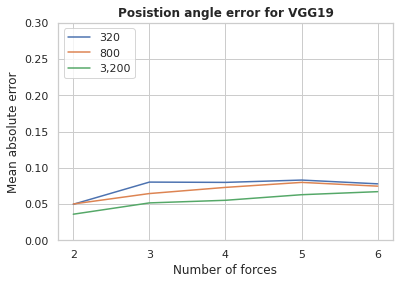

In [11]:
sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_inner, x="Number of forces", y="Mean absolute error", hue="Size of training set")
s.set(ylim = (0,0.3))
s.set(xticks = np.arange(2,7,1))
s.set_title('Posistion angle error for VGG19',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_angles_inner_error.pdf'),
            dpi=300, bbox_inches='tight')

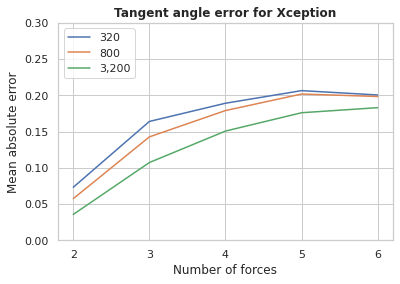

In [12]:
sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_tang, x="Number of forces", y="Mean absolute error", hue="Size of training set")
s.set(ylim = (0,0.3))
s.set(xticks = np.arange(2,7,1))
s.set_title('Tangent angle error for Xception',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_angles_tang_error.pdf'),
            dpi=300, bbox_inches='tight')

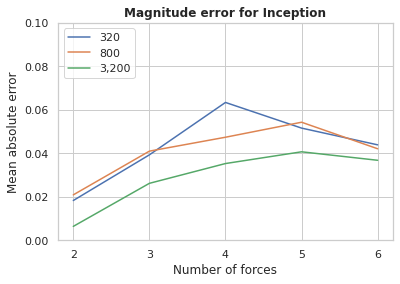

In [13]:
sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_mag, x="Number of forces", y="Mean absolute error", hue="Size of training set")
s.set(ylim = (0,0.1))
s.set(xticks = np.arange(2,7,1))
s.set_title('Magnitude error for Inception',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_magnitude_mae_error.pdf'),
            dpi=300, bbox_inches='tight')

#### Plot Magnitudes in Bins (MAE and MAPE)

In [15]:
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mae_400.pkl"), "rb") as fh:
  df_error_mae_400 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mae_1000.pkl"), "rb") as fh:
  df_error_mae_1000 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mae_4000.pkl"), "rb") as fh:
  df_error_mae_4000 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_400.pkl"), "rb") as fh:
  df_error_mape_400 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_1000.pkl"), "rb") as fh:
  df_error_mape_1000 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_4000.pkl"), "rb") as fh:
  df_error_mape_4000 = pickle.load(fh)

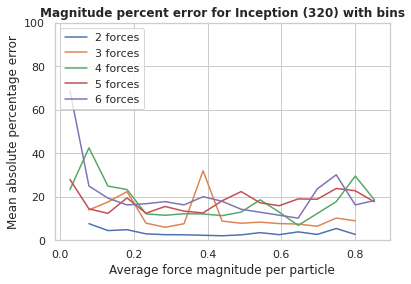

In [18]:
df_error_mape_400 = df_error_mape_400[df_error_mape_400['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_mape_400, x="Mean bin magnitude", y="Mean absolute percent error", hue="Forces")
s.set(ylim = (0,100))
s.set(xlabel = 'Average force magnitude per particle',
     ylabel = 'Mean absolute percentage error')
s.set_title('Magnitude percent error for Inception (320) with bins',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_400.pdf'), dpi=300, bbox_inches='tight')

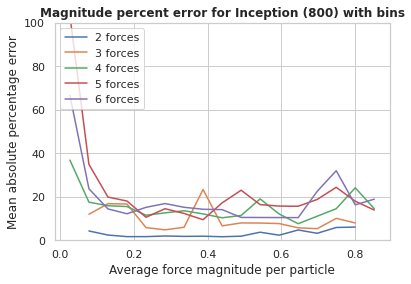

In [16]:
df_error_mape_1000 = df_error_mape_1000[df_error_mape_1000['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_mape_1000, x="Mean bin magnitude", y="Mean absolute percent error", hue="Forces")
s.set(ylim = (0,100))
s.set(xlabel = 'Average force magnitude per particle',
     ylabel = 'Mean absolute percentage error')
s.set_title('Magnitude percent error for Inception (800) with bins',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_1000.pdf'), dpi=300, bbox_inches='tight')

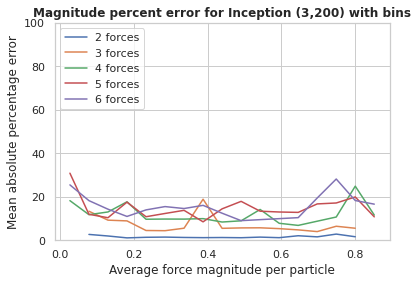

In [17]:
df_error_mape_4000 = df_error_mape_4000[df_error_mape_4000['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_mape_4000, x="Mean bin magnitude", y="Mean absolute percent error", hue="Forces")
s.set(ylim = (0,100))
s.set(xlabel = 'Average force magnitude per particle',
     ylabel = 'Mean absolute percentage error')
s.set_title('Magnitude percent error for Inception (3,200) with bins',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_4000.pdf'), dpi=300, bbox_inches='tight')